In [ ]:
import os
from tractviewer import TractViewer
from actiDep.data.loader import Actidep
from actiDep.set_config import get_HCP_bundle_names
NO_ACTI_CSV = "/home/ndecaux/report_optimized_no_actimetry_clusterFWE/summary_results.csv"
import pandas as pd

renaud_dep_controls = ['ATR', 'CC1','SLFI','SLFIII','STPREM', 'UF']
renaud_apathy = ['CC1','CC2','CST','SLFIII','STPREM']

to_remove = []
for b in renaud_dep_controls:
    if b+'right' in list(get_HCP_bundle_names().keys()):
        renaud_dep_controls.append(b+'left')
        renaud_dep_controls.append(b+'right')
        to_remove.append(b)

renaud_dep_controls= [b for b in renaud_dep_controls if b not in to_remove]

for b in renaud_apathy:
    if b+'right' in list(get_HCP_bundle_names().keys()):
        renaud_apathy.append(b+'left')
        renaud_apathy.append(b+'right')
        to_remove.append(b)
renaud_apathy= [b for b in renaud_apathy if b not in to_remove]

df=pd.read_csv(NO_ACTI_CSV)
df['val']=df['type'].apply(lambda x: x.split('_')[1])
df['type']=df['type'].apply(lambda x: x.split('_')[0])
df['csv']=df.apply(lambda row: os.path.join(os.path.dirname(NO_ACTI_CSV), 'figures', f"{row['bundle']}_{row['metric']}_{row['val']}_{row['type']}_{'corrected' if 'group' in row['type'] else "partial"}.csv"), axis=1)
df['png']=df.apply(lambda row: os.path.join(os.path.dirname(NO_ACTI_CSV), 'figures', f"{row['bundle']}_{row['metric']}_{row['val']}_{row['type']}_{'corrected' if 'group' in row['type'] else "partial"}.png"), axis=1)

filters={   
    "renaud_dep_controls": df['bundle'].isin(renaud_dep_controls),
    "renaud_apathy": df['bundle'].isin(renaud_apathy),
    "significant": df['n_sig_corrected'] > 0,
    "all_subs": df['removed_subjects']<2,
    "all_points": df['removed_points']<4,
    "metric": df['metric'].isin(['FA','IFW']),
    "dep_v_controls": df['val']=='group',
    "apathy": df['val']=='apathy'
}

filters_apathy = filters["renaud_apathy"] & filters["significant"] & filters["all_subs"] & filters["all_points"] & filters['apathy']
df_apathy = df[filters_apathy]
df
filters_dep_controls = filters["renaud_dep_controls"] & filters["significant"] & filters["all_subs"] & filters["all_points"] & filters['dep_v_controls']# & filters["metric"]
df_dep = df[filters_dep_controls]

### Dep vs Controles

In [8]:
df_dep.sort_values('bundle', inplace=True)

/tmp/ipykernel_697421/3559756903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep.sort_values('bundle', inplace=True)


Bundle :  CC1  Metric :  MD


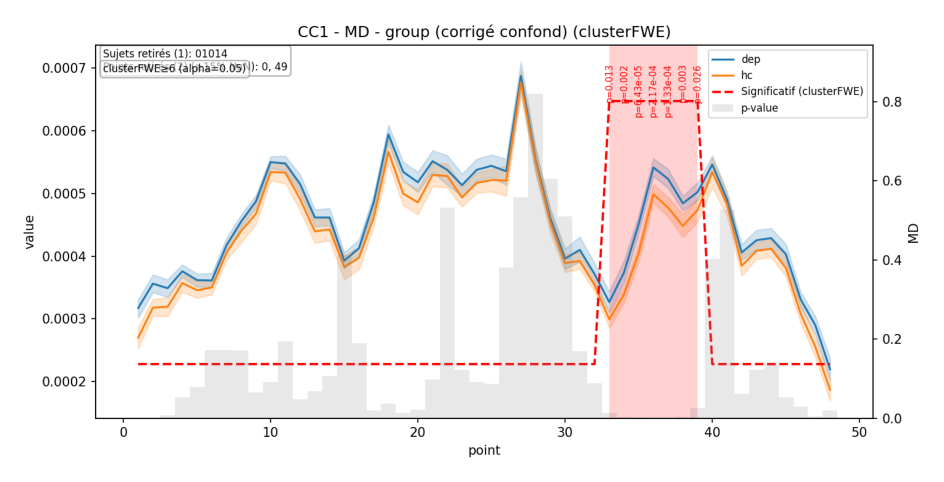

Bundle :  STPREMleft  Metric :  IFW


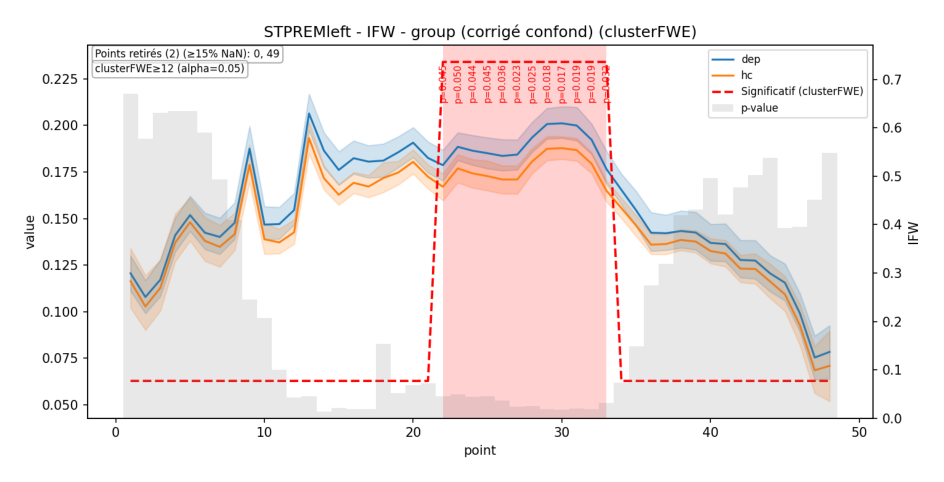

Bundle :  STPREMleft  Metric :  MD


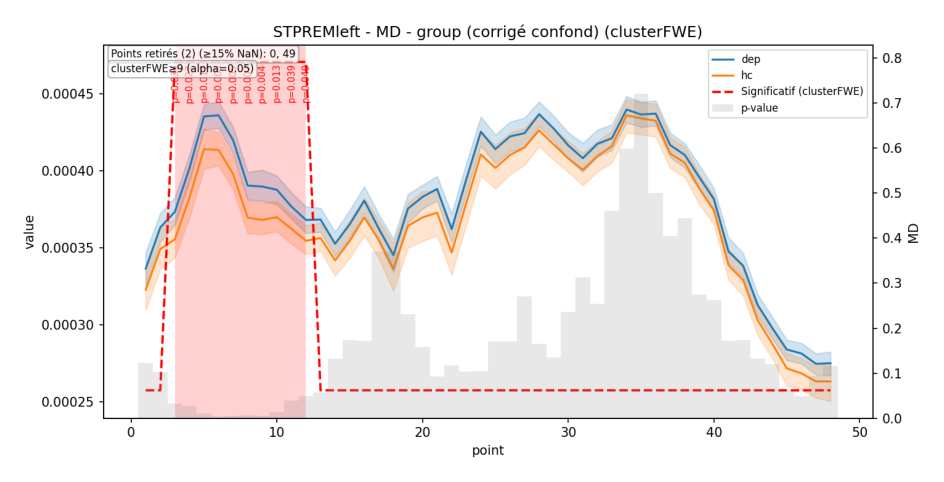

Bundle :  STPREMright  Metric :  MD


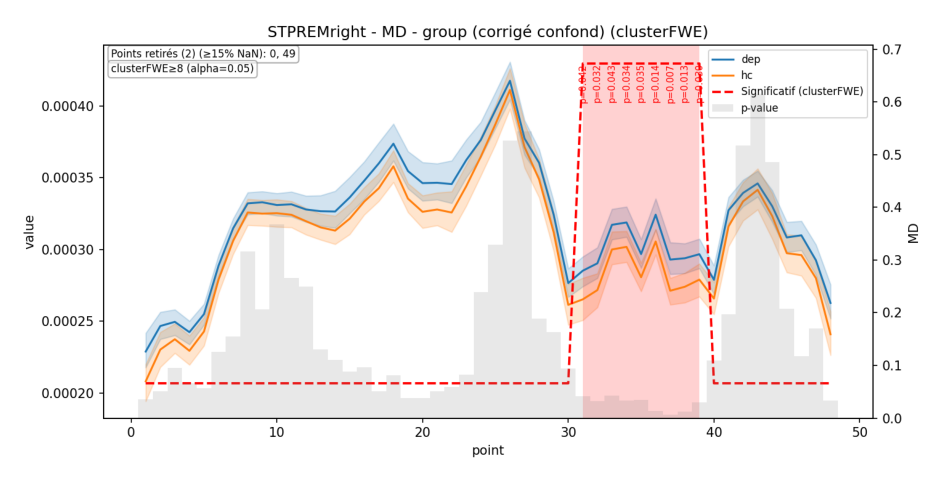

Bundle :  UFleft  Metric :  FA


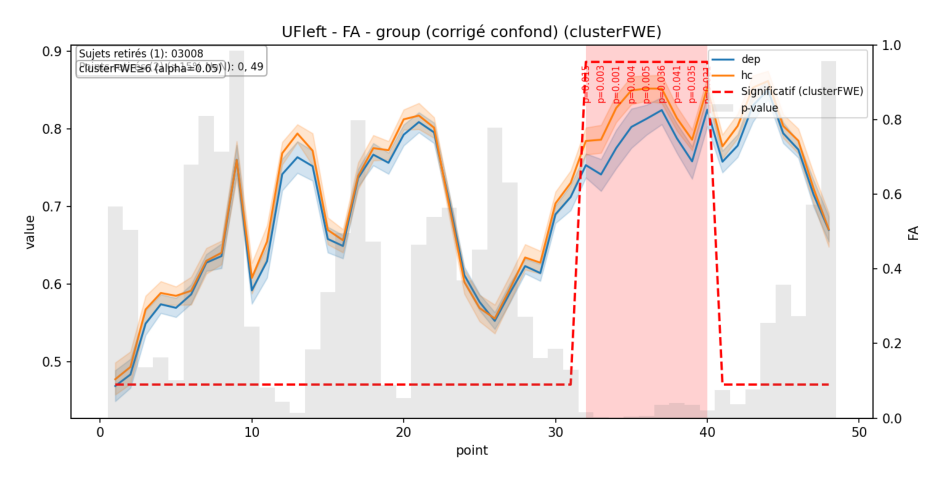

Bundle :  UFleft  Metric :  IFW


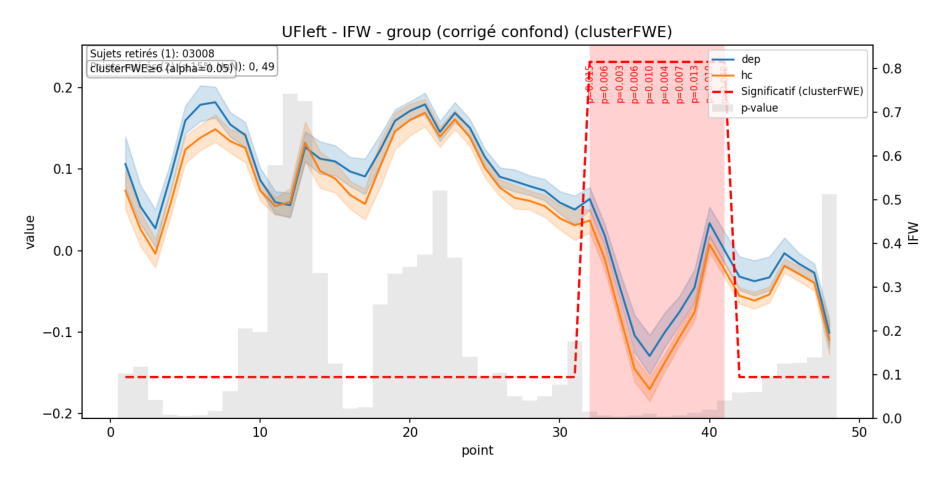

Bundle :  UFleft  Metric :  RD


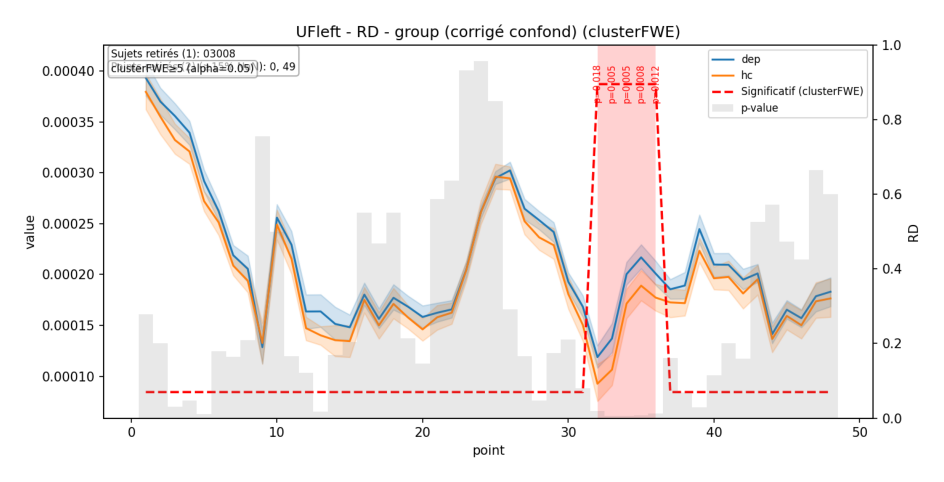

In [9]:
import matplotlib.pyplot as plt

# For each row in df_dep, display the png
for i, row in df_dep.iterrows():
    print('Bundle : ', row['bundle'], ' Metric : ', row['metric'])
    img = Image.open(row['png'])
    plt.figure(figsize=(12, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


### Apathetic vs Non Apathetic

In [11]:
df_apathy.sort_values('bundle', inplace=True)

/tmp/ipykernel_697421/3191863775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apathy.sort_values('bundle', inplace=True)


Bundle :  CSTright  Metric :  IRF


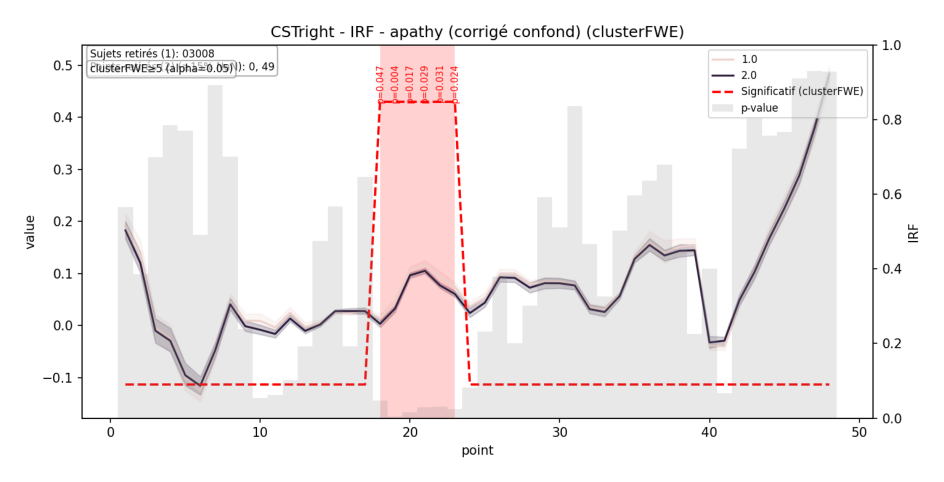

Bundle :  STPREMleft  Metric :  MD


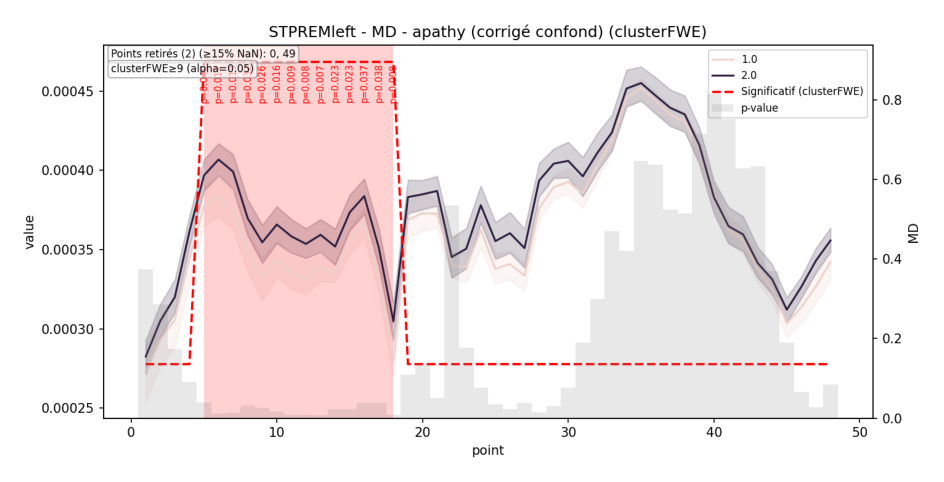

In [12]:
# For each row in df_dep, display the png
for i, row in df_apathy.iterrows():
    print('Bundle : ', row['bundle'], ' Metric : ', row['metric'])
    img = Image.open(row['png'])
    plt.figure(figsize=(12, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()